In [ ]:
# 数据预处理：
# 1. 视频转化为图片
# 2. 图片segment分割
# 3. 图片聚类得到label
# 4. 文本预处理
# 5. 最终数据合并

In [ ]:
############################################ 1. 视频转化为图片

In [ ]:
# 将所有的csv合并在一起。
import os
import pandas as pd

# 设置文件夹路径和输出文件名
folder_path = '/data1/dxw_data/llm/redbook_final/data/red_02/good'  # 替换为你的文件夹路径
# good文件夹里面是:
# 02_post_data_2024-06-16.csv
# 02_post_data_2024-06-17.csv
# 02_post_data_2024-06-18.csv
# 02_post_data_2024-06-19.csv
# 02_post_data_2024-06-20.csv
# 02_post_data_2024-06-21.csv
# 02_post_data_2024-06-22.cs
# 02_post_data_2024-06-23.csv
# 02_post_data_2024-06-24.csv
# 02_post_data_2024-06-25.csv
# 02_post_data_2024-06-26.csv
# 02_post_data_2024-06-27.csv
# 02_post_data_2024-06-28.csv
# 02_post_data_2024-06-29.csv
# 02_post_data_2024-06-30.csv
# 02_post_data_2024-07-01.csv
# 02_post_data_2024-07-02.csv
# 02_post_data_2024-07-03.csv
output_file = '/data1/dxw_data/llm/redbook_final/data/red_02/merged_good_raw.csv'  # 替换为你想要输出的文件名

# 创建一个空的列表来存储所有数据
all_data_frames = []

# 遍历文件夹中的所有CSV文件
for file_name in os.listdir(folder_path):
    if file_name.endswith('.csv'):
        file_path = os.path.join(folder_path, file_name)
        # 读取CSV文件并追加到列表中
        df = pd.read_csv(file_path)
        all_data_frames.append(df)

# 将所有数据框合并到一个大的数据框中
merged_df = pd.concat(all_data_frames, ignore_index=True)

# 将合并后的数据保存到一个新的CSV文件中
merged_df.to_csv(output_file, index=False)

print(f'所有文件已合并到 {output_file}')

#! 里面有些行看起来有问题，但是其实都是对的，不用管。


In [ ]:
# 读取 合并额csv_path 文件中的数据，并根据文件层次和目录读取对应的 path_filex 中的所有 png 和 mp4 文件，然后将它们重新命名并保存到 output_file_path 中。
# 按照日期排序

import os
import shutil
import pandas as pd
from tqdm import tqdm

# 设置文件路径
csv_path = "/data1/dxw_data/llm/redbook_final/data/red_02/merged_good_raw.csv"  # 请替换为你的CSV文件路径
path_filex = "/data1/dxw_data/llm/redbook_final/data/red_02/content0619_02"  # 请替换为你的path_filex目录路径
output_file_path = "/data1/dxw_data/llm/redbook_final/data2/video_img_all"  # 请替换为你的输出文件路径

# 读取CSV文件
df = pd.read_csv(csv_path)

# 遍历每一行数据，加入进度条
for index, row in tqdm(df.iterrows(), total=df.shape[0], desc="Processing files"):
    poster_id = row['poster_id']
    post_id = row['post_id']
    post_date = row['post_date']
    
    # 检查并修改post_date
    if post_date.startswith('2023-') or post_date.startswith('2024-'):
        post_date = post_date[5:]  # 删减掉前面的年份部分
    
    # 获取子文件夹路径
    subfolder_path = os.path.join(path_filex, str(poster_id), str(post_id))
    
    # 检查子文件夹是否存在
    if os.path.exists(subfolder_path):
        # 遍历子文件夹中的文件
        for file_name in os.listdir(subfolder_path):
            # 获取文件的完整路径
            file_path = os.path.join(subfolder_path, file_name)
            
            # 仅处理png和mp4文件
            if file_name.endswith('.png') or file_name.endswith('.mp4'):
                # 新文件名
                new_file_name = f"{post_date}_{poster_id}_{post_id}_{file_name}"
                new_file_path = os.path.join(output_file_path, new_file_name)
                
                # 创建输出文件夹路径（如果不存在）
                os.makedirs(output_file_path, exist_ok=True)
                
                # 复制并重命名文件到输出文件夹
                shutil.copy(file_path, new_file_path)
                
print("文件处理完成！")



In [ ]:
# 将视频也变成对应的png图片。
import os
import shutil
import cv2
import pandas as pd
from tqdm import tqdm

# 设置文件路径
input_file_path = "/data1/dxw_data/llm/redbook_final/data2/video_img_all"
output_file_path = "/data1/dxw_data/llm/redbook_final/data2/video_img_all_png"

# 创建输出文件夹路径（如果不存在）
os.makedirs(output_file_path, exist_ok=True)

# 遍历输入文件夹中的文件
for file_name in tqdm(os.listdir(input_file_path), desc="Processing files"):
    input_file = os.path.join(input_file_path, file_name)
    
    # 处理mp4文件
    if file_name.endswith('.mp4'):
        # 读取视频文件
        video_capture = cv2.VideoCapture(input_file)
        fps = video_capture.get(cv2.CAP_PROP_FPS)
        frame_count = int(video_capture.get(cv2.CAP_PROP_FRAME_COUNT))
        duration = frame_count / fps
        
        # 获取视频在1/4, 2/4, 3/4时刻的帧
        for i in range(1, 4):
            frame_time = duration * i / 4
            video_capture.set(cv2.CAP_PROP_POS_MSEC, frame_time * 1000)
            success, frame = video_capture.read()
            if success:
                # 保存帧为图片
                output_image_name = f"{file_name[:-4]}_{i}.png"
                output_image_path = os.path.join(output_file_path, output_image_name)
                cv2.imwrite(output_image_path, frame)
        
        # 释放视频捕获对象
        video_capture.release()
    
    # 处理png文件
    elif file_name.endswith('.png'):
        output_image_path = os.path.join(output_file_path, file_name)
        shutil.copy(input_file, output_image_path)

print("文件处理完成！")



In [ ]:
########################################################### 2. 图片segment分割

In [ ]:
去github下载安装：https://github.com/cxgincsu/SemanticGuidedHumanMatting


cd SemanticGuidedHumanMatting,test_image.py(添加检测忽略异常逻辑)

   CUDA_VISIBLE_DEVICES=1 python test_image.py \
       --images-dir "/data1/dxw_data/llm/redbook_final/data2/video_img_all_png" \
       --result-dir "/data1/dxw_data/llm/redbook_final/data2/segment_data" \
       --pretrained-weight ./pretrained/SGHM-ResNet50.pth

In [1]:
import os
from PIL import Image, ImageEnhance
import numpy as np
from tqdm import tqdm

def apply_mask(image, mask):
    """
    将掩码应用到图片上，根据掩码颜色决定是否覆盖原图
    """
    image_np = np.array(image)
    mask_np = np.array(mask)
    
    # 增加掩码对比度
    enhancer = ImageEnhance.Contrast(mask)
    mask = enhancer.enhance(2.0)
    
    mask_np = np.array(mask)
    
    # 如果掩码为黑色（值为0），则覆盖原图像素
    mask_binary = (mask_np == 0).astype(np.uint8)
    
    # 应用掩码，覆盖黑色区域
    masked_image = image_np * (1 - mask_binary[:, :, np.newaxis]) + np.zeros_like(image_np) * mask_binary[:, :, np.newaxis]
    
    # 确保掩码区域透明处理
    alpha_channel = (1 - mask_binary) * 255
    masked_image = np.dstack((masked_image, alpha_channel))
    
    return Image.fromarray(masked_image.astype(np.uint8))

def merge_images(image_dir, mask_dir, output_dir):
    """
    合并图片和掩码，并保存到新的文件夹
    """
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    image_files = [f for f in os.listdir(image_dir) if f.endswith('.png')]
    mask_files = [f for f in os.listdir(mask_dir) if f.endswith('.png')]
    
    for image_file in tqdm(image_files, desc="Processing images"):
        image_path = os.path.join(image_dir, image_file)
        mask_path = os.path.join(mask_dir, image_file)
        
        if not os.path.exists(mask_path):
            print(f"掩码缺失: {mask_path}")
            continue
        
        image = Image.open(image_path).convert('RGB')
        mask = Image.open(mask_path).convert('L')  # 假设掩码是灰度图
        
        masked_image = apply_mask(image, mask)
        output_path = os.path.join(output_dir, image_file)
        masked_image.save(output_path, 'PNG')  # 保存为PNG格式以保留透明度
        # print(f"图片已合并并保存到 {output_path}！")

# 定义图片、掩码和输出文件夹路径
image_dir = r'/data1/dxw_data/llm/redbook_final/data2/all_processed_data'  # 替换为你的正常图片文件夹路径
mask_dir = r'/data1/dxw_data/llm/redbook_final/script_next/data_img_20%_segcloth_background'  # 替换为你的掩码图片文件夹路径
output_dir = r'/data1/dxw_data/llm/redbook_final/script_next/combined_seg_img_pure'  # 替换为你的输出文件夹路径

merge_images(image_dir, mask_dir, output_dir)


Processing images:  13%|█▎        | 1815/14468 [11:26<1:31:49,  2.30it/s]

In [ ]:
################################################ 3. 图片聚类得到label

In [1]:
# 指定聚类数量的imagebind的算法，开始给图片分配标签
# 需要从https://github.com/facebookresearch/ImageBind?tab=readme-ov-file中下载：imagebind的预训练 保存到/.checkpoints：  


import os
import json
import torch
from sklearn.cluster import KMeans
from imagebind.models import imagebind_model
from imagebind.models.imagebind_model import ModalityType
from imagebind import data
from PIL import Image
from torchvision import transforms
import shutil
from tqdm import tqdm

# Paths
input_folder = '/data1/dxw_data/llm/redbook_final/data_removeblack' 
output_folder = '/data1/dxw_data/llm/redbook_final/data_removeblack_cluster_imagebind100'
os.makedirs(output_folder, exist_ok=True)

# Device setup
device = "cuda:4" if torch.cuda.is_available() else "cpu"

# Instantiate model
model = imagebind_model.imagebind_huge(pretrained=True)
model.eval()
model.to(device)

# Image transformation
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Load image paths
image_paths = [os.path.join(input_folder, fname) for fname in os.listdir(input_folder) if fname.endswith('.png')]

# Function to load and transform a batch of images
def load_images_batch(image_paths_batch):
    images = [transform(Image.open(path).convert('RGB')) for path in image_paths_batch]
    return torch.stack(images).to(device)

# Batch size
batch_size = 32  # Adjust based on your GPU memory

# Generate embeddings in batches
all_embeddings = []
for i in tqdm(range(0, len(image_paths), batch_size), desc="Generating embeddings"):
    batch_paths = image_paths[i:i + batch_size]
    images_tensor = load_images_batch(batch_paths)
    with torch.no_grad():
        embeddings = model({ModalityType.VISION: images_tensor})
    all_embeddings.append(embeddings[ModalityType.VISION].cpu())
    torch.cuda.empty_cache()  # Clear cache to free memory

# Concatenate all embeddings
all_embeddings = torch.cat(all_embeddings, dim=0)

# Clustering
kmeans = KMeans(n_clusters=100, random_state=0)
labels = kmeans.fit_predict(all_embeddings.numpy())

# Save clustered images to output folders
for idx, label in tqdm(enumerate(labels), desc="Saving clustered images", total=len(labels)):
    label_folder = os.path.join(output_folder, str(label))
    os.makedirs(label_folder, exist_ok=True)
    shutil.copy(image_paths[idx], os.path.join(label_folder, os.path.basename(image_paths[idx])))

# Save labels to JSON
labels_json = {os.path.basename(image_paths[idx]): int(label) for idx, label in enumerate(labels)}
with open(os.path.join(output_folder, 'labels.json'), 'w') as f:
    json.dump(labels_json, f)

print(f'Clustering complete. Output saved to {output_folder}')


/home/dxw/anaconda3/envs/agent/lib/python3.8/site-packages/torchvision/transforms/functional_tensor.py:5: UserWarning: The torchvision.transforms.functional_tensor module is deprecated in 0.15 and will be **removed in 0.17**. Please don't rely on it. You probably just need to use APIs in torchvision.transforms.functional or in torchvision.transforms.v2.functional.
  warnings.warn(
/home/dxw/anaconda3/envs/agent/lib/python3.8/site-packages/torchvision/transforms/_functional_video.py:6: UserWarning: The 'torchvision.transforms._functional_video' module is deprecated since 0.12 and will be removed in the future. Please use the 'torchvision.transforms.functional' module instead.
  warnings.warn(
/home/dxw/anaconda3/envs/agent/lib/python3.8/site-packages/torchvision/transforms/_transforms_video.py:22: UserWarning: The 'torchvision.transforms._transforms_video' module is deprecated since 0.12 and will be removed in the future. Please use the 'torchvision.transforms' module instead.
  warning

Clustering complete. Output saved to /data1/dxw_data/llm/redbook_final/data_removeblack_cluster_imagebind100


In [2]:
import os
import json
import torch
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from imagebind.models import imagebind_model
from imagebind.models.imagebind_model import ModalityType
from imagebind import data
from PIL import Image
from torchvision import transforms
import shutil
from tqdm import tqdm

# Concatenate all embeddings
all_embeddings = torch.cat(all_embeddings, dim=0)

# Determine optimal number of clusters using Average Silhouette Method
silhouette_scores = []
k_values = [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 30, 40, 50, 60, 70, 80, 90, 100, 150, 200]  # Discrete values for k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(all_embeddings.numpy())
    score = silhouette_score(all_embeddings.numpy(), labels)
    silhouette_scores.append(score)

# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Average Silhouette Score')
plt.title('Average Silhouette Score vs. Number of Clusters')
plt.grid(True)
plt.show()

optimal_k = k_values[silhouette_scores.index(max(silhouette_scores))]

# Perform clustering with optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
labels = kmeans.fit_predict(all_embeddings.numpy())

# Save clustered images to output folders
for idx, label in tqdm(enumerate(labels), desc="Saving clustered images", total=len(labels)):
    label_folder = os.path.join(output_folder, str(label))
    os.makedirs(label_folder, exist_ok=True)
    shutil.copy(image_paths[idx], os.path.join(label_folder, os.path.basename(image_paths[idx])))

# Save labels to JSON
labels_json = {os.path.basename(image_paths[idx]): int(label) for idx, label in enumerate(labels)}
with open(os.path.join(output_folder, 'labels.json'), 'w') as f:
    json.dump(labels_json, f)
                                                                                                                                                                                                                                                                                                                                                                                                                                                                
print(f'Clustering complete. Output saved to {output_folder}')


NameError: name 'all_embeddings' is not defined

In [ ]:
# 得到的分类label结果格式转化
import json
import pandas as pd

# 读取labels.json文件
labels_file = '/data1/dxw_data/llm/redbook_final/data3/output_cluster_imagebind3/labels.json'
with open(labels_file, 'r', encoding='utf-8') as f:
    labels_data = json.load(f)

# 初始化结果列表
results = []

# 处理每个标签
for image_name, category in labels_data.items():
    parts = image_name.split('_')
    poster_id = parts[1]
    post_id = parts[2]
    results.append({
        'poster_id': poster_id,
        'post_id': post_id,
        'nums_category_img': category
    })

# 转换结果为DataFrame
df = pd.DataFrame(results)

# 保存到新的CSV文件
output_file = '/data1/dxw_data/llm/redbook_final/data3/clustered_labels_imagebind100.csv'   # 最终训练用的结果
df.to_csv(output_file, index=False, encoding='utf-8')

print(f"Data has been successfully saved to {output_file}.")


In [ ]:
######################################################## 4. 文本预处理

In [ ]:
import pandas as pd
import emoji
import re
import jieba

# 读取停用词表
stopwords_file_path = '/data1/dxw_data/llm/ML/LIWC/datasets/stopwords_cn.txt'
with open(stopwords_file_path, 'r', encoding='utf-8') as file:
    stopwords = set(file.read().splitlines())

# 读取CSV文件
csv_file_path = '/data1/dxw_data/llm/redbook_final/data/red_01/merged_good_raw.csv'
df = pd.read_csv(csv_file_path)

# 将post_title, post_content, post_tag列的内容拼接合并为一个新的列summary
df['summary'] = df['post_title'].astype(str) + " " + df['post_content'].astype(str) + " " + df['post_tag'].astype(str)

# 定义数据清洗和过滤函数
def clean_summary(text, stopwords):
    # 去除HTML标签
    text = re.sub(r'<.*?>', '', text)
    # 转换表情符号
    text = emoji.demojize(text)
    # 分词
    words = jieba.cut(text)
    # 去除停用词
    cleaned_text = ' '.join([word for word in words if word not in stopwords])
    return cleaned_text

# 定义同义词过滤函数
def replace_synonyms(value):
    value = str(value).replace('+', '')
    value = re.sub(r'(\d+)k', lambda m: str(int(m.group(1)) * 1000), value)
    value = re.sub(r'(\d+)w', lambda m: str(int(m.group(1)) * 10000), value)
    value = value.replace('1千', '1000').replace('1万', '10000')
    return value

# 应用清洗和过滤函数到summary列
df['summary'] = df['summary'].apply(lambda x: clean_summary(x, stopwords))

# 应用同义词过滤函数到post_comments, post_like, post_collect列
for col in ['post_comments', 'post_like', 'post_collect']:
    df[col] = df[col].apply(replace_synonyms)

# 保存结果到新的CSV文件
cleaned_csv_file_path = '/data1/dxw_data/llm/redbook_final/data/red_01/merged_good_raw_nlpclean.csv'
df.to_csv(cleaned_csv_file_path, index=False)

print(f"Data has been cleaned, stopwords removed, emojis converted, and synonyms standardized. The cleaned data has been saved to {cleaned_csv_file_path}.")


In [ ]:
################################################### 5. 最终数据合并

In [ ]:
# 0 合并文本数值信息到图片中。

import pandas as pd

# 读取 CSV 文件
merged_df = pd.read_csv('/data1/dxw_data/llm/redbook_final/data/red_03/merged_good_raw_nlpclean.csv')
clustered_df = pd.read_csv('/data1/dxw_data/llm/redbook_final/data3/clustered_labels_imagebind100.csv')

# 选择需要的列
selected_columns = ['poster_id', 'post_id', 'post_date', 'post_like', 'post_collect']

# 从 merged_df 中提取所需列
merged_selected_df = merged_df[selected_columns]

# 合并数据框
merged_result_df = pd.merge(clustered_df, merged_selected_df, on=['poster_id', 'post_id'], how='left')

# 保存结果到新的 CSV 文件
merged_result_df.to_csv('/data1/dxw_data/llm/redbook_final/script_next/alldata_20%.csv', index=False)

print("数据已成功合并并保存到新的 CSV 文件中。")


In [ ]:
# 以上，数据预处理步骤完成。
# 之后请跳转label.ipynb文件，开始进行分类和回归任务的label具体划分

/home/dxw/anaconda3/envs/agent/lib/python3.8/site-packages/torchvision/transforms/functional_tensor.py:5: UserWarning: The torchvision.transforms.functional_tensor module is deprecated in 0.15 and will be **removed in 0.17**. Please don't rely on it. You probably just need to use APIs in torchvision.transforms.functional or in torchvision.transforms.v2.functional.
  warnings.warn(
/home/dxw/anaconda3/envs/agent/lib/python3.8/site-packages/torchvision/transforms/_functional_video.py:6: UserWarning: The 'torchvision.transforms._functional_video' module is deprecated since 0.12 and will be removed in the future. Please use the 'torchvision.transforms.functional' module instead.
  warnings.warn(
/home/dxw/anaconda3/envs/agent/lib/python3.8/site-packages/torchvision/transforms/_transforms_video.py:22: UserWarning: The 'torchvision.transforms._transforms_video' module is deprecated since 0.12 and will be removed in the future. Please use the 'torchvision.transforms' module instead.
  warning

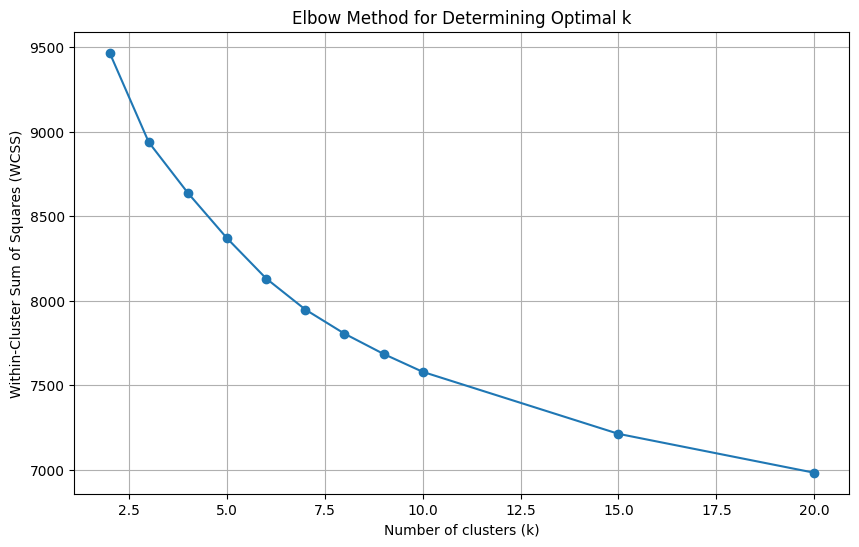

/home/dxw/anaconda3/envs/agent/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Saving clustered images: 100%|██████████| 19367/19367 [00:12<00:00, 1599.13it/s]

Clustering complete. Output saved to /data1/dxw_data/llm/redbook_final/data3/combined_seg_img_cluster_imagebind_elbow


In [1]:
import os
import json
import torch
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from imagebind.models import imagebind_model
from imagebind.models.imagebind_model import ModalityType
from imagebind import data
from PIL import Image
from torchvision import transforms
import shutil
from tqdm import tqdm

# Paths
input_folder = '/data1/dxw_data/llm/redbook_final/data3/combined_seg_img'
output_folder = '/data1/dxw_data/llm/redbook_final/data3/combined_seg_img_cluster_imagebind_elbow'
os.makedirs(output_folder, exist_ok=True)

# Device setup
device = "cuda:3" if torch.cuda.is_available() else "cpu"

# Instantiate model
model = imagebind_model.imagebind_huge(pretrained=True)
model.eval()
model.to(device)

# Image transformation
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Load image paths
image_paths = [os.path.join(input_folder, fname) for fname in os.listdir(input_folder) if fname.endswith('.png')]

# Function to load and transform a batch of images
def load_images_batch(image_paths_batch):
    images = [transform(Image.open(path).convert('RGB')) for path in image_paths_batch]
    return torch.stack(images).to(device)

# Batch size
batch_size = 32  # Adjust based on your GPU memory

# Generate embeddings in batches
all_embeddings = []
for i in tqdm(range(0, len(image_paths), batch_size), desc="Generating embeddings"):
    batch_paths = image_paths[i:i + batch_size]
    images_tensor = load_images_batch(batch_paths)
    with torch.no_grad():
        embeddings = model({ModalityType.VISION: images_tensor})
    all_embeddings.append(embeddings[ModalityType.VISION].cpu())
    torch.cuda.empty_cache()  # Clear cache to free memory

# Concatenate all embeddings
all_embeddings = torch.cat(all_embeddings, dim=0)

# Determine optimal number of clusters using Elbow Method
wcss = []
k_values = [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20]  # Discrete values for k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(all_embeddings.numpy())
    wcss.append(kmeans.inertia_)

# Plot WCSS scores
plt.figure(figsize=(10, 6))
plt.plot(k_values, wcss, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Determining Optimal k')
plt.grid(True)
plt.show()

# Select optimal k (example: based on elbow point)
optimal_k = 5  # Replace with chosen optimal k based on the elbow plot

# Perform clustering with optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
labels = kmeans.fit_predict(all_embeddings.numpy())

# Save clustered images to output folders
for idx, label in tqdm(enumerate(labels), desc="Saving clustered images", total=len(labels)):
    label_folder = os.path.join(output_folder, str(label))
    os.makedirs(label_folder, exist_ok=True)
    shutil.copy(image_paths[idx], os.path.join(label_folder, os.path.basename(image_paths[idx])))

# Save labels to JSON
labels_json = {os.path.basename(image_paths[idx]): int(label) for idx, label in enumerate(labels)}
with open(os.path.join(output_folder, 'labels.json'), 'w') as f:
    json.dump(labels_json, f)

print(f'Clustering complete. Output saved to {output_folder}')
